<a href="https://colab.research.google.com/github/Anirudh-gupta-g/8-Weeks-SQL-Challenge-Solutions/blob/main/NLP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Word Embedding and Text Classififcation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   synopsis  1539 non-null   object
 1   genre     1539 non-null   object
dtypes: object(2)
memory usage: 24.2+ KB
None
                                                 synopsis     genre
count                                                1539      1539
unique                                               1539        10
top     100,000 years ago, at least six human species ...  thriller
freq                                                    1       481
0    100,000 years ago, at least six human species ...
1    "Diamond has written a book of remarkable scop...
2    In the book, Zinn presented a different side o...
3    Author Erik Larson imbues the incredible event...
4    Discovered in the attic in which she spent the...
Name: synopsis, dtype: object


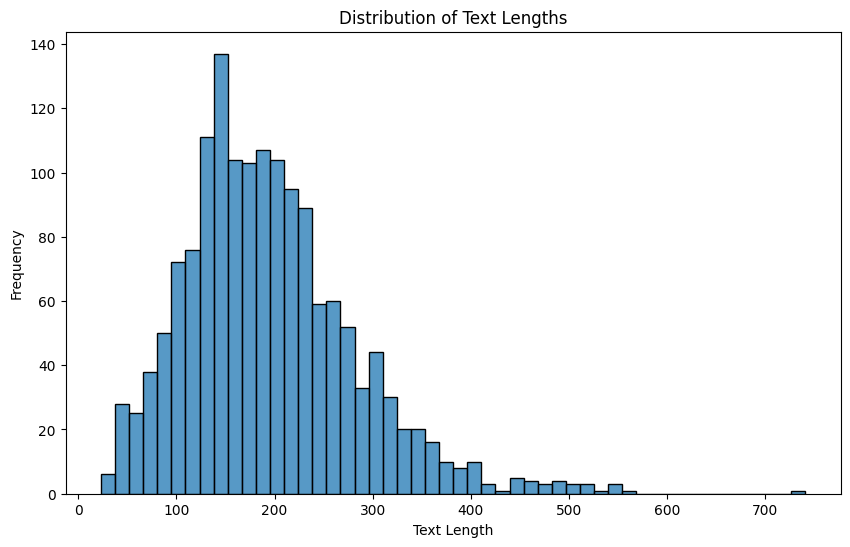

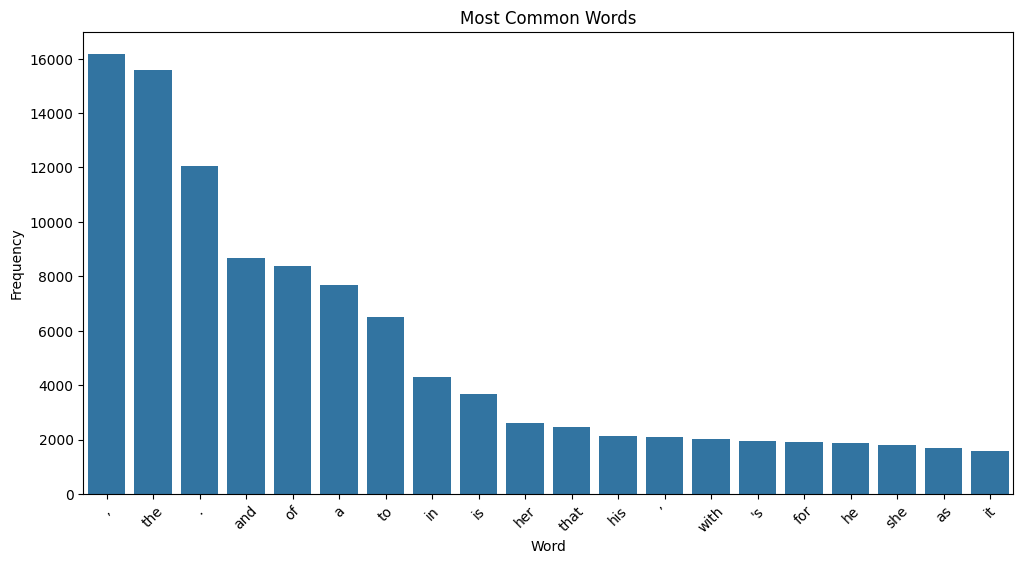

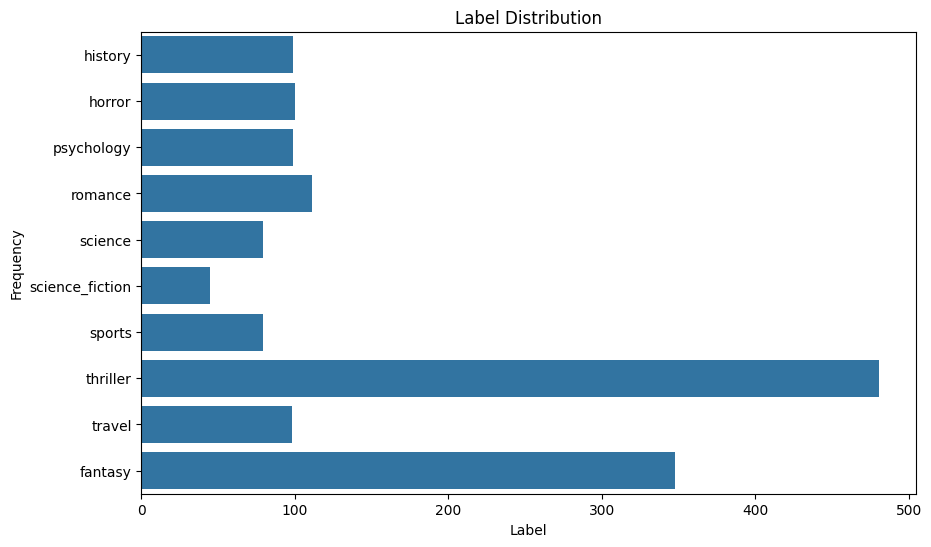

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure nltk resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the data
file_path = 'BookDataset.csv'
data = pd.read_csv(file_path)

# Basic Data Information and Statistics
print(data.info())
print(data.describe())
print(data['synopsis'].head())

# Lowercase the text
data['synopsis'] = data['synopsis'].str.lower()
# Tokenization
data['tokens'] = data['synopsis'].apply(nltk.word_tokenize)

# Distribution of Text Lengths
data['text_length'] = data['tokens'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Most Common Words
all_words = [word for tokens in data['tokens'] for word in tokens]
all_word_freq = nltk.FreqDist(all_words)
common_words = all_word_freq.most_common(20)

# Plot Most Common Words
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.title('Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Label Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['genre'])  # Replace 'label_column' with your label column name
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['synopsis'])
sequences = tokenizer.texts_to_sequences(data['synopsis'])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Padding sequences
max_length = 100
X = pad_sequences(sequences, maxlen=max_length)

y = data['genre']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=10)

In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.optimizers import Adam


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [ ]:
# Building the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=15, input_length=max_length))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

# Assuming a binary classification problem, adjust the activation function and loss if necessary
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/50
39/39 [==============================] - 2s 17ms/step - loss: 2.1717 - accuracy: 0.2340 - val_loss: 1.9508 - val_accuracy: 0.2987
Epoch 2/50
39/39 [==============================] - 1s 18ms/step - loss: 1.7653 - accuracy: 0.3761 - val_loss: 1.7809 - val_accuracy: 0.2857
Epoch 3/50
39/39 [==============================] - 1s 16ms/step - loss: 1.2028 - accuracy: 0.5500 - val_loss: 1.7783 - val_accuracy: 0.3506
Epoch 4/50
39/39 [==============================] - 1s 19ms/step - loss: 0.5580 - accuracy: 0.8197 - val_loss: 2.0877 - val_accuracy: 0.3084
Epoch 5/50
39/39 [==============================] - 1s 18ms/step - loss: 0.1223 - accuracy: 0.9813 - val_loss: 2.3420 - val_accuracy: 0.3052
Epoch 6/50
39/39 [==============================] - 1s 15ms/step - loss: 0.0154 - accuracy: 0.9984 - val_loss: 2.5116 - val_accuracy: 0.3344
Epoch 7/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 2.5480 - val_accuracy: 0.3571
Epoch 8/50
39

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Building the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=15, input_length=max_length))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Output layer for multi-class classification
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/50
39/39 [==============================] - 62s 17ms/step - loss: 2.5525 - accuracy: 0.2689 - val_loss: 2.3129 - val_accuracy: 0.3247
Epoch 2/50
39/39 [==============================] - 0s 12ms/step - loss: 2.2713 - accuracy: 0.3030 - val_loss: 2.1644 - val_accuracy: 0.3247
Epoch 3/50
39/39 [==============================] - 0s 12ms/step - loss: 2.0481 - accuracy: 0.3103 - val_loss: 2.0533 - val_accuracy: 0.3279
Epoch 4/50
39/39 [==============================] - 1s 13ms/step - loss: 1.8211 - accuracy: 0.3201 - val_loss: 1.9869 - val_accuracy: 0.3409
Epoch 5/50
39/39 [==============================] - 0s 11ms/step - loss: 1.6806 - accuracy: 0.3842 - val_loss: 2.0076 - val_accuracy: 0.3344
Epoch 6/50
39/39 [==============================] - 0s 13ms/step - loss: 1.5304 - accuracy: 0.4890 - val_loss: 1.9984 - val_accuracy: 0.3442
Epoch 7/50
39/39 [==============================] - 0s 12ms/step - loss: 1.3108 - accuracy: 0.6101 - val_loss: 2.0368 - val_accuracy: 0.3669
Epoch 8/50
3

Epoch 1/50
39/39 [==============================] - 3s 28ms/step - loss: 2.5394 - accuracy: 0.2543 - val_loss: 2.2878 - val_accuracy: 0.3247
Epoch 2/50
39/39 [==============================] - 1s 13ms/step - loss: 2.2527 - accuracy: 0.3014 - val_loss: 2.1316 - val_accuracy: 0.3247
Epoch 3/50
39/39 [==============================] - 0s 12ms/step - loss: 2.0286 - accuracy: 0.2949 - val_loss: 2.0193 - val_accuracy: 0.3214
Epoch 4/50
39/39 [==============================] - 0s 12ms/step - loss: 1.8113 - accuracy: 0.3063 - val_loss: 1.9532 - val_accuracy: 0.3669
Epoch 5/50
39/39 [==============================] - 0s 12ms/step - loss: 1.6753 - accuracy: 0.3753 - val_loss: 1.9173 - val_accuracy: 0.3799
Epoch 6/50
39/39 [==============================] - 0s 11ms/step - loss: 1.5603 - accuracy: 0.4866 - val_loss: 1.9432 - val_accuracy: 0.3929
Epoch 7/50
39/39 [==============================] - 0s 12ms/step - loss: 1.3546 - accuracy: 0.5768 - val_loss: 1.9578 - val_accuracy: 0.3409
Epoch 8/50
39

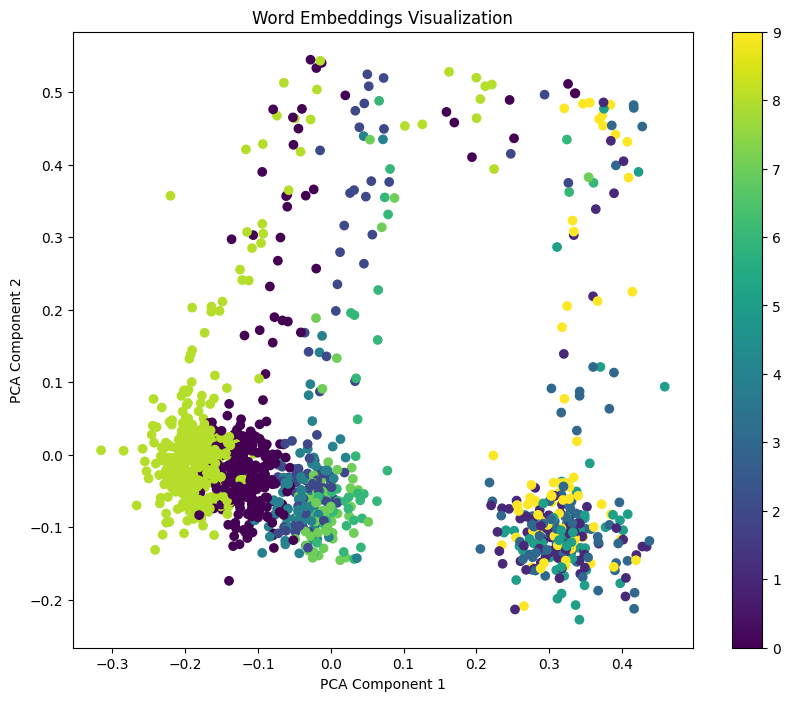

In [ ]:
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input

# Building the model
input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=15, input_length=max_length)(input_layer)
flatten_layer = Flatten()(embedding_layer)
dense1 = Dense(100, activation='relu', kernel_regularizer=l2(0.001))(flatten_layer)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(100, activation='relu', kernel_regularizer=l2(0.001))(dropout1)
dropout2 = Dropout(0.5)(dense2)
dense3 = Dense(100, activation='relu', kernel_regularizer=l2(0.001))(dropout2)
dropout3 = Dropout(0.5)(dense3)
output_layer = Dense(10, activation='softmax')(dropout3)

model = Model(inputs=input_layer, outputs=output_layer)

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])

# Extract embedding vectors
embedding_model = Model(inputs=model.input, outputs=embedding_layer)
embedding_vectors = embedding_model.predict(X_train)

# Flatten the embedding vectors for PCA
embedding_vectors_flat = np.reshape(embedding_vectors, (embedding_vectors.shape[0], -1))

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_vectors_flat)

# Visualize the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=np.argmax(y_train, axis=1), cmap='viridis')
plt.colorbar()
plt.title('Word Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Predict the class for a given description
description = "arguing that transformative ideas don’t arise from the day-to-day, gradual process of experimentation and data accumulation but that the revolutions in science"
description2 = "As the aliens traverse the country in huge three-legged machines, incinerating all in their path with a heat ray and spreading noxious toxic gases"
description = description.lower()
description2 = description2.lower()
description_sequence = tokenizer.texts_to_sequences([description])
description_sequence2 = tokenizer.texts_to_sequences([description2])
description_padded = pad_sequences(description_sequence, maxlen=max_length)
description_padded2 = pad_sequences(description_sequence2, maxlen=max_length)


# Predict the class
predicted_probabilities = model.predict(description_padded)
predicted_probabilities2 = model.predict(description_padded2)
predicted_class = np.argmax(predicted_probabilities, axis=1)
predicted_class2 = np.argmax(predicted_probabilities2, axis=1)

# Decode the prediction to get the class label
predicted_label = label_encoder.inverse_transform(predicted_class)
print(f'Predictions: {predicted_probabilities}')
print(f'Predicted Class: {predicted_label[0]}')
predicted_label2 = label_encoder.inverse_transform(predicted_class2)
print(f'Predictions: {predicted_probabilities2}')
print(f'Predicted Class: {predicted_label2[0]}')

1/1 [==============================] - 0s 21ms/step
Predictions: [[0.10943315 0.10464898 0.10879792 0.10253993 0.10302155 0.09638454
  0.08268546 0.0921066  0.09956513 0.10081673]]
Predicted Class: fantasy
Predictions: [[0.10907722 0.10414179 0.1095494  0.10265744 0.10350589 0.09588904
  0.08262105 0.0924371  0.09999192 0.1001291 ]]
Predicted Class: horror


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Define function to get word embedding
def get_word_embedding(word):
    word_idx = word_index.get(word)
    if word_idx is not None:
        word_seq = pad_sequences([[word_idx]], maxlen=max_length)
        embedding_vector = embedding_model.predict(word_seq)
        return embedding_vector[0][0]
    else:
        print(f"Word '{word}' not found in the vocabulary.")
        return None

# Calculate cosine similarity
def calculate_cosine_similarity(word1, word2):
    embedding1 = get_word_embedding(word1)
    embedding2 = get_word_embedding(word2)

    if embedding1 is not None and embedding2 is not None:
        similarity = cosine_similarity([embedding1], [embedding2])[0][0]
        print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")
    else:
        print(f"Could not calculate cosine similarity for '{word1}' and '{word2}'.")

# Words to compare
word_pairs = [("scared", "fear"), ("secret", "private"), ("prison", "jail")]

# Calculate and print cosine similarities
for word1, word2 in word_pairs:
    calculate_cosine_similarity(word1, word2)

1/1 [==============================] - 0s 21ms/step
Cosine similarity between 'scared' and 'fear': 1.0000
1/1 [==============================] - 0s 23ms/step
Cosine similarity between 'secret' and 'private': 1.0000
1/1 [==============================] - 0s 22ms/step
Cosine similarity between 'prison' and 'jail': 1.0000
